In [1]:
from keras import models
import os

#download kaggle rock-paper-scissors image set
os.environ['KAGGLE_USERNAME'] = "jc16357"
os.environ['KAGGLE_KEY'] = "12db5ebe29714aa53d09cc1e982c4958"
!kaggle datasets download -d drgfreeman/rockpaperscissors

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

rockpaperscissors.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
# Upload data
from zipfile import ZipFile

file_name = "/content/rockpaperscissors.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()

In [3]:
#commented to prevent operations being performed multiple times
#rename content of /paper/ and /scissor/ directories to follow naming cnvention <type>_<number>
print(os.listdir('/content/paper/'))
#ignore rock
counter = 0
for filename in os.listdir('/content/paper/'):
    os.rename('/content/paper/' + str(filename), '/content/paper/paper_' + str(counter) + '.png')
    counter += 1
#print(os.listdir('/content/paper/'))
counter = 0
for filename in os.listdir('/content/scissors/'):
    os.rename('/content/scissors/' + str(filename), '/content/scissors/scissors_' + str(counter) + '.png')
    counter += 1
#print(os.listdir('/content/scissors/'))
#print(os.listdir('/content/scissors/'))
print(os.listdir('/content/paper/'))

['73UfZ8Dwj0OB66IV.png', 'B3dlyiRDulDJWOsW.png', 'yfoLtt4c7Rzc5VOW.png', 'neo7ALjpzKdzVCj1.png', 'cUFSYeNYdnhRB6MD.png', 'G4QepYlFnpE8Zse4.png', 'et9oIiGQmAgwy7GK.png', 'v6Ypsa9vPurMnl20.png', 'dZh2VMRu9nRGHhYL.png', '7I1fABs6SL1T4MNb.png', 'AqNY2b7NX9Ce3CjZ.png', 'TYjJigXjEyiVntzx.png', '3sKeYzYsjbWQVhc4.png', 'U2InMVDH10R24eOb.png', 'pMQfFsmXAu2xZuUv.png', '3JN7OPsnxDBpcVeD.png', 'Qbn4RJqessetWPHR.png', 'g028Qv0lVlEbKi1q.png', 'Gv71lr2m5b9rBwPy.png', 'cfCjmEcXysh0H52D.png', '50Wjlq1jW7o3wcl8.png', 'V3Z0tEoM7Cq761eZ.png', 'pwM1GeKjG7KE4i75.png', '9zuFLFklb0ibEelE.png', 'ejC8QIku5jrtci48.png', 'pt2EHjG6vxV6Hjmf.png', 'Rxmuq5Y6dw22QESt.png', 'fiX6rjBt5qHGMsjc.png', 'mK7Kqflg12vHFBEK.png', 'oi2e7ny5y00NBLOx.png', 'MLURv7NBoSPK4f1h.png', 'WVfwcOw6nXcg4xER.png', '37PRV3B9HxuUPkQr.png', 'D3mbFhVy7zFkZEtV.png', 'ac0j8jCfz8hwpY0o.png', 'wBUGgxpeb0gggcTx.png', 'nPEUpKKphLYH3Bjy.png', 'xnLyw2TBZF8e2vcr.png', 'HarpXSxVfoAJ9cFe.png', 'mZW0RUegJl9SM8ck.png', '9szmJOWlXxEbjDGV.png', 'znZ3UHvUM8ySVp

In [4]:
#keep 710 of each to balance dataset
for i in range(710, 751):
    current_file_path = '/content/scissors/scissors_' + str(i) + '.png'
    if os.path.isfile(current_file_path):
        os.remove(current_file_path)
for i in range(710, 713):
    current_file_path = '/content/paper/paper_' + str(i) + '.png'
    if os.path.isfile(current_file_path):
        os.remove(current_file_path)

#split into 568 train / 71 validation / 71 test for each
if not os.path.exists('/content/train'):
    os.mkdir('/content/train')
for i in range(568):
    try:
        current_file_path = '/content/scissors/scissors_' + str(i) + '.png'
        new_file_path = '/content/train/scissors_' + str(i) + '.png'
        os.rename(current_file_path, new_file_path)
        current_file_path = '/content/paper/paper_' + str(i) + '.png'
        new_file_path = '/content/train/paper_' + str(i) + '.png'
        os.rename(current_file_path, new_file_path)
    except:
        pass

if not os.path.exists('/content/test'):
    os.mkdir('/content/test')
for i in range(568, 639):
    try:
        current_file_path = '/content/scissors/scissors_' + str(i) + '.png'
        new_file_path = '/content/test/scissors_' + str(i) + '.png'
        os.rename(current_file_path, new_file_path)
        current_file_path = '/content/paper/paper_' + str(i) + '.png'
        new_file_path = '/content/test/paper_' + str(i) + '.png'
        os.rename(current_file_path, new_file_path)
    except:
        pass

if not os.path.exists('/content/validate'):
    os.mkdir('/content/validate')
for i in range(639, 711):
    try:
        current_file_path = '/content/scissors/scissors_' + str(i) + '.png'
        new_file_path = '/content/validate/scissors_' + str(i) + '.png'
        os.rename(current_file_path, new_file_path)
        current_file_path = '/content/paper/paper_' + str(i) + '.png'
        new_file_path = '/content/validate/paper_' + str(i) + '.png'
        os.rename(current_file_path, new_file_path)
    except:
        pass

scis_file_list = os.listdir('/content/scissors/')
print(len(scis_file_list))
paper_file_list = os.listdir('/content/paper')
print(len(paper_file_list))
train_file_list = os.listdir('/content/train')
print(len(train_file_list))
test_file_list = os.listdir('/content/test')
print(len(test_file_list))
valid_file_list = os.listdir('/content/validate')
print(len(valid_file_list))

try:
    os.mkdir('/content/train/paper/')
    os.mkdir('/content/train/scissors/')
    os.mkdir('/content/test/paper/')
    os.mkdir('/content/test/scissors/')
    os.mkdir('/content/validate/paper/')
    os.mkdir('/content/validate/scissors/')
except:
    pass

#go through each of {train, test, validate}
for set_type in ['train', 'test', 'validate']:
    #get each file
    flist = os.listdir('/content/' + set_type)
    for f in flist:
        #find paper* and put into /content/x/paper/
        if(f.startswith('paper') and os.path.isfile('/content/' + set_type + '/' + f)):
            os.rename('/content/' + set_type + '/' + f, '/content/' + set_type + '/paper/' + f)
        #find scissors* and put into /content/x/scissors
        elif(os.path.isfile('/content/' + set_type + '/' + f)):
            os.rename('/content/' + set_type + '/' + f, '/content/' + set_type + '/scissors/' + f)

0
0
1136
142
142


Found 1136 images belonging to 2 classes.
Found 142 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 275s 3s/step - loss: 0.7912 - acc: 0.6536 - val_loss: 0.7466 - val_acc: 0.5110
Epoch 2/30
100/100 [==============================] - 272s 3s/step - loss: 0.6432 - acc: 0.6580 - val_loss: 0.7460 - val_acc: 0.4945
Epoch 3/30
100/100 [==============================] - 272s 3s/step - loss: 0.6303 - acc: 0.6776 - val_loss: 0.7640 - val_acc: 0.4890
Epoch 4/30
100/100 [==============================] - 272s 3s/step - loss: 0.6379 - acc: 0.6667 - val_loss: 0.7477 - val_acc: 0.5061
Epoch 5/30
100/100 [==============================] - 272s 3s/step - loss: 0.6324 - acc: 0.6739 - val_loss: 0.7735 - val_acc: 0.4890
Epoch 6/30
100/100 [==============================] - 272s 3s/step - loss: 0.6362 - acc: 0.6685 - val_loss: 0.7388 - val_acc: 0.5165
Epoch 7/30
100/100 [==============================] - 271s 3s/step - loss: 0.6316 - acc: 0.6748 - val_loss: 0.7763 - va

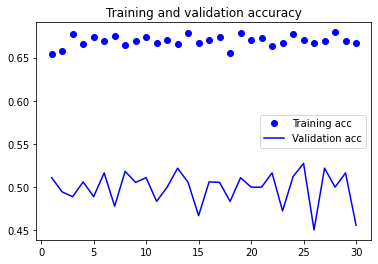

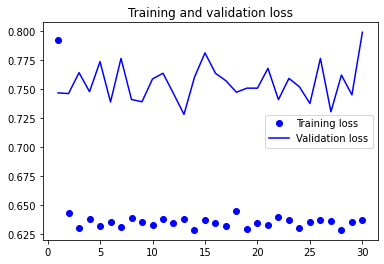

In [20]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(300, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))

from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

from keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/train/'
test_dir = '/content/test/'
validation_dir = '/content/validate/'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(300, 200), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(300, 200),
                                                        batch_size=20,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)

model.save('paper_vs_scissors.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()